### Darcy Thompson

## Wachstum und Form der Transformation

#### Koordinatentransformationen

## Afine Transformation

![](images/af_trans.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform as tf

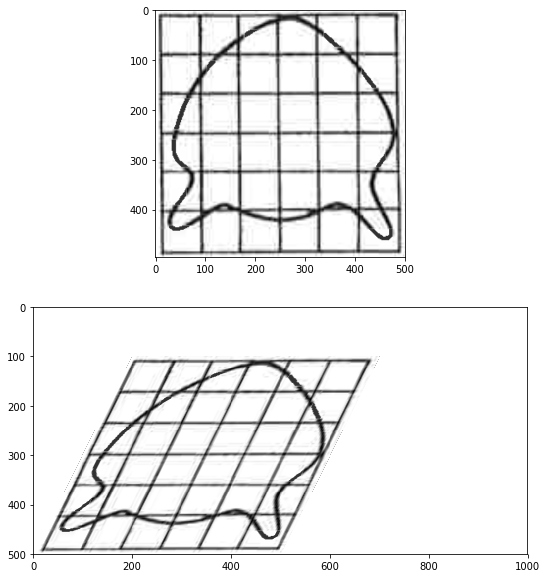

In [93]:


img = plt.imread("images/fig1.png")

fig = plt.figure(figsize=(10,10))
ax = fig.subplots(nrows=2)

ax[0].imshow(img)

src = np.array([[200, 100],  [700, 100], [0, 500], [500, 500]])
dst = np.array([[0, 0], [500, 0], [0, 500], [500, 500]])

tform = tf.ProjectiveTransform()
tform.estimate(src, dst)
warped = tf.warp(img, tform3, output_shape=(500, 1000))

ax[1].imshow(warped)








### Krumlinige Koordinaten

![](images/Krappen.png)

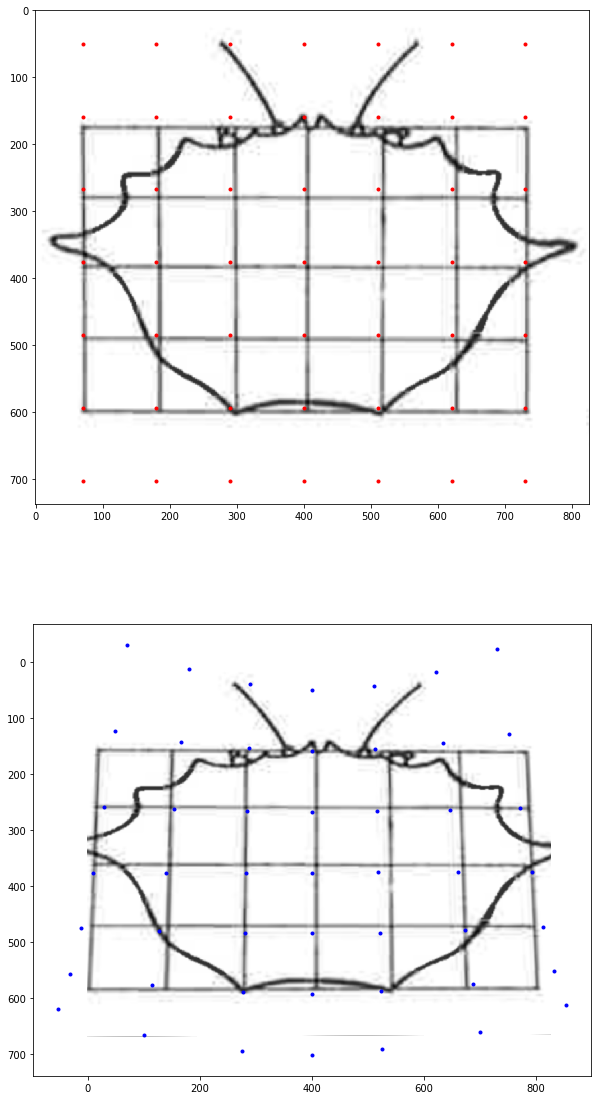

In [94]:
from math import pi
img = plt.imread("images/krap1.png")
img2 = plt.imread("images/krap2.png")

rows, cols = img.shape[0], img.shape[1]

#src grid
src_cols = np.linspace(0, cols, 7)
src_cols /= 1.25
src_cols += 70
src_rows = np.linspace(0, rows, 7)
src_rows /= 1.04
src_rows += 50 
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

#dest grid
dst_rows = src[:, 1]-400 
dst_cols = src[:, 0]-400 
dst_cols +=(np.array([np.linspace(0,5,7)*(2.9*np.sin(x))**3 for x in np.linspace(-pi/2,pi/2,7)]).reshape(1,49)[0])
dst_rows -= (np.array([np.linspace(-4.6,4.9,7)*x+0.2 for x in np.linspace(-1.9,1.9,7)]).reshape(1,49)[0])**2

dst_rows += 400
dst_cols += 400
dst = np.dstack([dst_cols, dst_rows])[0]

dst = np.vstack([dst_cols, dst_rows]).T
tform.estimate(dst, src)

out_rows = img.shape[0]
out_cols = cols
out = tf.warp(img, tform, output_shape=(out_rows, out_cols))

fig = plt.figure(figsize=(10,20))
ax = fig.subplots(nrows=2)

ax[0].imshow(img)
ax[0].plot(src[:, 0], src[:, 1], '.r')
ax[1].imshow(out)
ax[1].plot(dst[:, 0], dst[:, 1], '.b')



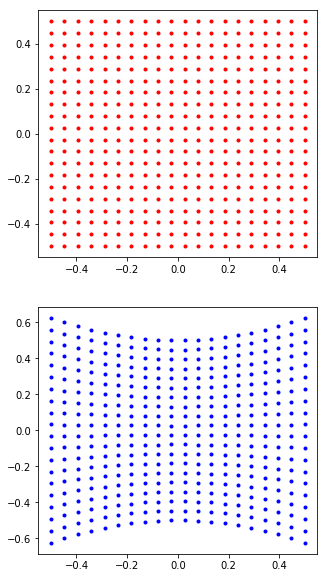

In [39]:
from math import pi
img = plt.imread("images/krap1.png")
#img2 = plt.imread("images/krap2.png")

rows, cols = img.shape[0], img.shape[1]


#src Gitter 20 x 20 (Linien) , Einheitszelle um 0,0,,
gx = 20
gy = 20

src_cols = np.linspace(0, cols, gx)
src_cols /= cols
src_cols -= 0.5
src_rows = np.linspace(0, rows, gy)
src_rows /= rows
src_rows -= 0.5 
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

#dest Gitter Funktion von src-Gitter
dst_rows = np.array(src[:, 1]) # y
dst_cols = np.array(src[:, 0]) # x

dst_rows *= (np.array([np.linspace(1,1,gy)*(x**2+1) for x in np.linspace(-0.5,0.5,gx)]).reshape(1,gx*gy)[0])

dst = np.dstack([dst_cols, dst_rows])[0]


fig = plt.figure(figsize=(5,10))
ax = fig.subplots(nrows=2)

ax[0].plot(src[:, 0], src[:, 1], '.r')
ax[1].plot(dst[:, 0], dst[:, 1], '.b')

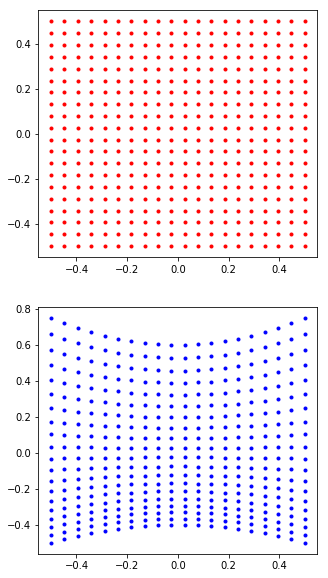

In [40]:
from math import pi
img = plt.imread("images/krap1.png")
#img2 = plt.imread("images/krap2.png")

rows, cols = img.shape[0], img.shape[1]


#src Gitter 20 x 20 (Linien) , Einheitszelle um 0,0,,
gx = 20
gy = 20

src_cols = np.linspace(0, cols, gx)
src_cols /= cols
src_cols -= 0.5
src_rows = np.linspace(0, rows, gy)
src_rows /= rows
src_rows -= 0.5 
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

#dest Gitter Funktion von src-Gitter
dst_rows = np.array(src[:, 1]) # y
dst_cols = np.array(src[:, 0]) # x

dst_rows *= (np.array([np.linspace(0.8,1.2,gy)*(x**2+1) for x in np.linspace(-0.5,0.5,gx)]).reshape(1,gx*gy)[0])

dst = np.dstack([dst_cols, dst_rows])[0]


fig = plt.figure(figsize=(5,10))
ax = fig.subplots(nrows=2)

ax[0].plot(src[:, 0], src[:, 1], '.r')
ax[1].plot(dst[:, 0], dst[:, 1], '.b')

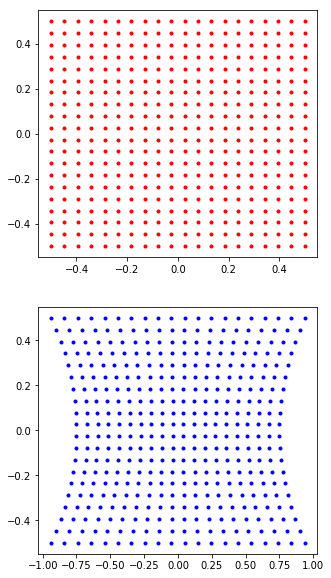

In [47]:
from math import pi
img = plt.imread("images/krap1.png")
#img2 = plt.imread("images/krap2.png")

rows, cols = img.shape[0], img.shape[1]


#src Gitter 20 x 20 (Linien) , Einheitszelle um 0,0,,
gx = 20
gy = 20

src_cols = np.linspace(0, cols, gx)
src_cols /= cols
src_cols -= 0.5
src_rows = np.linspace(0, rows, gy)
src_rows /= rows
src_rows -= 0.5 
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

#dest Gitter Funktion von src-Gitter
dst_rows = np.array(src[:, 1]) # y
dst_cols = np.array(src[:, 0]) # x

#dst_rows *= (np.array([np.linspace(0.8,1.2,gy)*(x**2+1) for x in np.linspace(-0.5,0.5,gx)]).reshape(1,gx*gy)[0])
dst_cols *= (np.array([(np.linspace(-0.5,0.5,gx)**2+1)*(y**2+0.5) for y in np.linspace(1,1,gy)]).reshape(1,gx*gy)[0])


dst = np.dstack([dst_cols, dst_rows])[0]


fig = plt.figure(figsize=(5,10))
ax = fig.subplots(nrows=2)

ax[0].plot(src[:, 0], src[:, 1], '.r')
ax[1].plot(dst[:, 0], dst[:, 1], '.b')

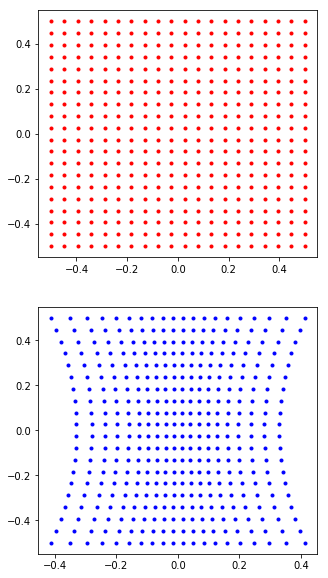

In [48]:
from math import pi
img = plt.imread("images/krap1.png")
#img2 = plt.imread("images/krap2.png")

rows, cols = img.shape[0], img.shape[1]


#src Gitter 20 x 20 (Linien) , Einheitszelle um 0,0,,
gx = 20
gy = 20

src_cols = np.linspace(0, cols, gx)
src_cols /= cols
src_cols -= 0.5
src_rows = np.linspace(0, rows, gy)
src_rows /= rows
src_rows -= 0.5 
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

#dest Gitter Funktion von src-Gitter
dst_rows = np.array(src[:, 1]) # y
dst_cols = np.array(src[:, 0]) # x

#dst_rows *= (np.array([np.linspace(0.8,1.2,gy)*(x**2+1) for x in np.linspace(-0.5,0.5,gx)]).reshape(1,gx*gy)[0])
dst_cols *= (np.array([(np.linspace(-0.5,0.5,gx)**2+1)*(y**2+0.5) for y in np.linspace(-0.4,0.4,gy)]).reshape(1,gx*gy)[0])


dst = np.dstack([dst_cols, dst_rows])[0]


fig = plt.figure(figsize=(5,10))
ax = fig.subplots(nrows=2)

ax[0].plot(src[:, 0], src[:, 1], '.r')
ax[1].plot(dst[:, 0], dst[:, 1], '.b')

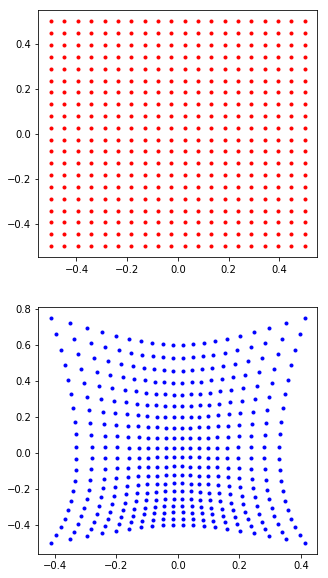

In [49]:
from math import pi
img = plt.imread("images/krap1.png")
#img2 = plt.imread("images/krap2.png")

rows, cols = img.shape[0], img.shape[1]


#src Gitter 20 x 20 (Linien) , Einheitszelle um 0,0,,
gx = 20
gy = 20

src_cols = np.linspace(0, cols, gx)
src_cols /= cols
src_cols -= 0.5
src_rows = np.linspace(0, rows, gy)
src_rows /= rows
src_rows -= 0.5 
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

#dest Gitter Funktion von src-Gitter
dst_rows = np.array(src[:, 1]) # y
dst_cols = np.array(src[:, 0]) # x

dst_rows *= (np.array([np.linspace(0.8,1.2,gy)*(x**2+1) for x in np.linspace(-0.5,0.5,gx)]).reshape(1,gx*gy)[0])
dst_cols *= (np.array([(np.linspace(-0.5,0.5,gx)**2+1)*(y**2+0.5) for y in np.linspace(-0.4,0.4,gy)]).reshape(1,gx*gy)[0])


dst = np.dstack([dst_cols, dst_rows])[0]


fig = plt.figure(figsize=(5,10))
ax = fig.subplots(nrows=2)

ax[0].plot(src[:, 0], src[:, 1], '.r')
ax[1].plot(dst[:, 0], dst[:, 1], '.b')

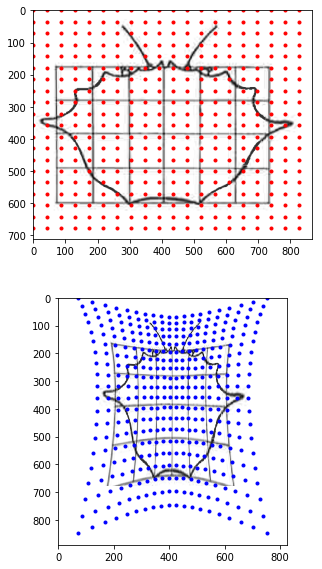

In [56]:
from math import pi
img = plt.imread("images/krap1.png")
#img2 = plt.imread("images/krap2.png")

rows, cols = img.shape[0], img.shape[1]


#src Gitter 20 x 20 (Linien) , Einheitszelle um 0,0,,
gx = 20
gy = 20

src_cols = np.linspace(0, cols, gx)
src_cols /= cols
src_cols -= 0.5
src_rows = np.linspace(0, rows, gy)
src_rows /= rows
src_rows -= 0.5 
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

#dest Gitter Funktion von src-Gitter
dst_rows = np.array(src[:, 1]) # y
dst_cols = np.array(src[:, 0]) # x

dst_rows *= (np.array([np.linspace(0.8,1.2,gy)*(x**2+1) for x in np.linspace(-0.5,0.5,gx)]).reshape(1,gx*gy)[0])
dst_cols *= (np.array([(np.linspace(-0.5,0.5,gx)**2+1)*(y**2+0.5) for y in np.linspace(-0.4,0.4,gy)]).reshape(1,gx*gy)[0])

dst = np.dstack([dst_cols, dst_rows])[0]


## Transformation auf Pixelgiter
src_p_rows = np.array(src[:, 1]) # y
src_p_cols = np.array(src[:, 0]) # x
src_p_rows += 0.5
src_p_cols += 0.5
src_p_rows *= rows
src_p_cols *= cols
src_p = np.dstack([src_p_cols, src_p_rows])[0]

dst_p_rows = np.array(dst[:, 1]) # y
dst_p_cols = np.array(dst[:, 0]) # x
dst_p_rows += 0.5
dst_p_cols += 0.5
dst_p_rows *= rows
dst_p_cols *= cols
dst_p = np.dstack([dst_p_cols, dst_p_rows])[0]

tform = tf.PiecewiseAffineTransform()
tform.estimate(dst_p, src_p)

out_rows = img.shape[0]
out_cols = cols
out = tf.warp(img, tform, output_shape=(out_rows, out_cols))

fig = plt.figure(figsize=(5,10))
ax = fig.subplots(nrows=2)

ax[0].imshow(img)
ax[0].plot(src_p[:, 0], src_p[:, 1], '.r')
ax[1].imshow(out)
ax[1].plot(dst_p[:, 0], dst_p[:, 1], '.b')





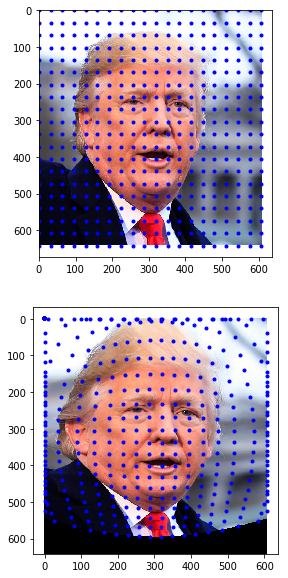

In [66]:
from math import pi
img = plt.imread("images/trump-december-15.jpg")
#img2 = plt.imread("images/krap2.png")

rows, cols = img.shape[0], img.shape[1]


#src Gitter 20 x 20 (Linien) , Einheitszelle um 0,0,,
gx = 20
gy = 20

src_cols = np.linspace(0, cols, gx)
src_cols /= cols
src_cols -= 0.5
src_rows = np.linspace(0, rows, gy)
src_rows /= rows
src_rows -= 0.5 
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

#dest Gitter Funktion von src-Gitter
dst_rows = np.array(src[:, 1]) # y
dst_cols = np.array(src[:, 0]) # x

dst_rows *= (np.array([np.linspace(0.8,1.2,gy)*(x**2+1) for x in np.linspace(-0.5,0.5,gx)]).reshape(1,gx*gy)[0])
dst_cols *= (np.array([(np.linspace(-0.5,0.5,gx)**2+1)*(-1*y**2+0.9) for y in np.linspace(-0.4,0.4,gy)]).reshape(1,gx*gy)[0])

dst = np.dstack([dst_cols, dst_rows])[0]


## Transformation auf Pixelgiter
src_p_rows = np.array(src[:, 1]) # y
src_p_cols = np.array(src[:, 0]) # x
src_p_rows += 0.5
src_p_cols += 0.5
src_p_rows *= rows
src_p_cols *= cols
src_p = np.dstack([src_p_cols, src_p_rows])[0]

dst_p_rows = np.array(dst[:, 1]) # y
dst_p_cols = np.array(dst[:, 0]) # x
dst_p_rows += 0.5
dst_p_cols += 0.5
dst_p_rows *= rows
dst_p_cols *= cols
dst_p = np.dstack([dst_p_cols, dst_p_rows])[0]

tform = tf.PiecewiseAffineTransform()
tform.estimate(src_p, dst_p)

out_rows = img.shape[0]
out_cols = cols
out = tf.warp(img, tform, output_shape=(out_rows, out_cols))

fig = plt.figure(figsize=(5,10))
ax = fig.subplots(nrows=2)

ax[0].imshow(img)
ax[0].plot(src_p[:, 0], src_p[:, 1], '.b')
ax[1].imshow(out)

ax[1].plot(tform.inverse(src_p)[:, 0], tform.inverse(src_p)[:, 1], '.b')


(-0.5, 606.5, 841.5, -0.5)

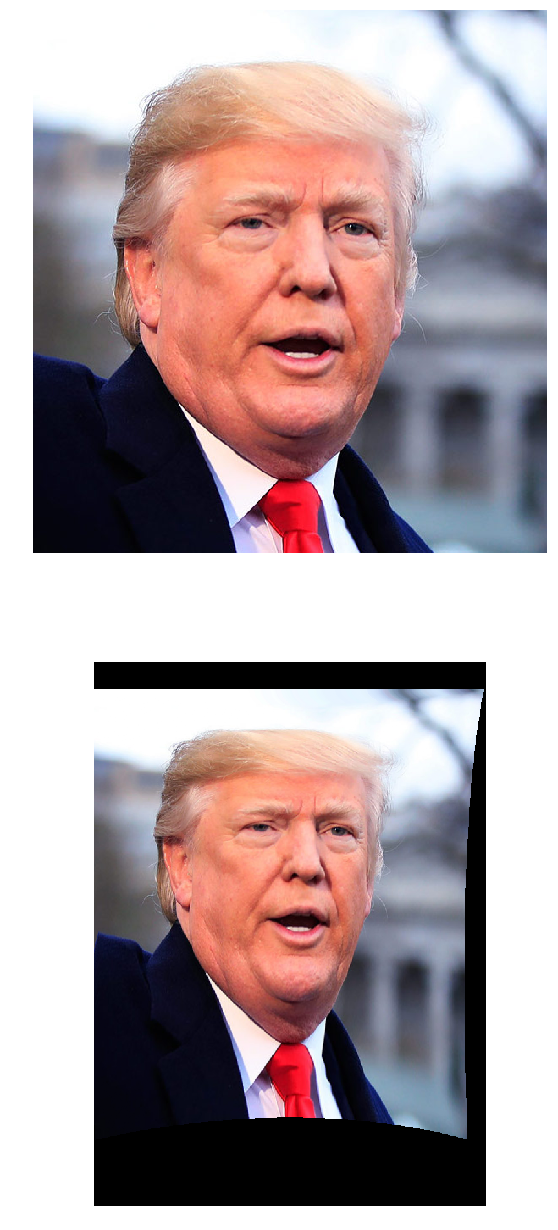

In [149]:
from math import pi
img = plt.imread("images/trump-december-15.jpg")
#img2 = plt.imread("images/krap2.png")

rows, cols = img.shape[0], img.shape[1]


#src Gitter 20 x 20 (Linien) , Einheitszelle um 0,0,,
gx = 20
gy = 20

src_cols = np.linspace(0, cols, gx)
src_cols /= cols
src_cols -= 0.5
src_rows = np.linspace(0, rows, gy)
src_rows /= rows
src_rows -= 0.5 
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

#dest Gitter Funktion von src-Gitter
dst_rows = np.array(src[:, 1]) # y
dst_cols = np.array(src[:, 0]) # x

dst_rows *= (np.array([np.linspace(0.8,1.2,gy)*(x**2+1) for x in np.linspace(-0.3,0.3,gx)]).reshape(1,gx*gy)[0])
dst_cols *= (np.array([(0.5*np.linspace(-0.5,0.2,gx)**2+1.1)*(-1*y**2+0.9) for y in np.linspace(-0.1,0.3,gy)]).reshape(1,gx*gy)[0])

dst = np.dstack([dst_cols, dst_rows])[0]


## Transformation auf Pixelgiter
src_p_rows = np.array(src[:, 1]) # y
src_p_cols = np.array(src[:, 0]) # x
src_p_rows += 0.5
src_p_cols += 0.5
src_p_rows *= rows
src_p_cols *= cols
src_p = np.dstack([src_p_cols, src_p_rows])[0]

dst_p_rows = np.array(dst[:, 1]) # y
dst_p_cols = np.array(dst[:, 0]) # x
dst_p_rows += 0.5
dst_p_cols += 0.5
dst_p_rows *= rows
dst_p_cols *= cols
dst_p = np.dstack([dst_p_cols, dst_p_rows])[0]

tform = tf.PiecewiseAffineTransform()
tform.estimate(dst_p,src_p)

out_rows = img.shape[0]+200
out_cols = cols
out = tf.warp(img, tform, output_shape=(out_rows, out_cols))

fig = plt.figure(figsize=(10,22))
ax = fig.subplots(nrows=2)

ax[0].imshow(img)
#ax[0].plot(src_p[:, 0], src_p[:, 1], '.b')
ax[0].axis('off')
ax[1].imshow(out)
#ax[1].plot(tform.inverse(src_p)[:, 0], tform.inverse(src_p)[:, 1], '.b')
ax[1].axis('off')

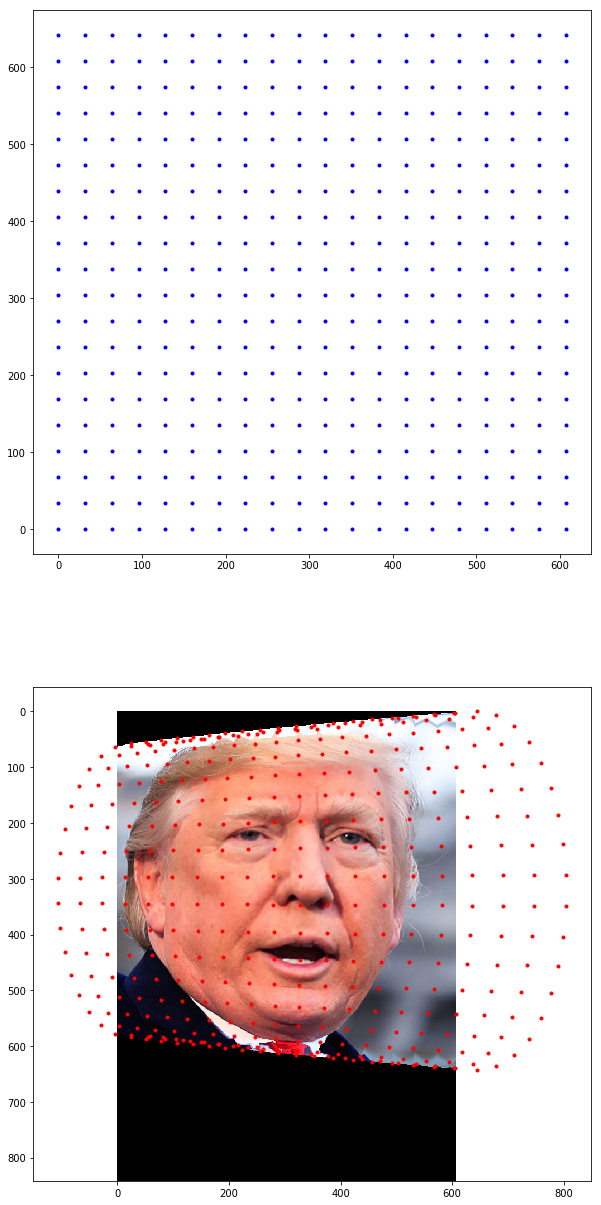

In [161]:
### from math import pi
img = plt.imread("images/trump-december-15.jpg")
#img2 = plt.imread("images/krap2.png")

rows, cols = img.shape[0], img.shape[1]


#src Gitter 20 x 20 (Linien) , Einheitszelle um 0,0,,
gx = 20
gy = 20

src_cols = np.linspace(0, cols, gx)
src_cols /= cols
src_cols -= 0.5
src_rows = np.linspace(0, rows, gy)
src_rows /= rows
src_rows -= 0.5 
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

#dest Gitter Funktion von src-Gitter
dst_rows = np.array(src[:, 1]) # y
dst_cols = np.array(src[:, 0]) # x

#vertikal verzerren  1. Komponente reihenweise , 2. Komponente spaltenweise
dst_rows *= (np.array([(np.linspace(-1,1,gy)**2*-0.6+1.5)*x for x in np.linspace(0.9,1.1,gx)]).reshape(1,gx*gy)[0])

#horizontal verzerren  1. Komponente reihenweise , 2. Komponente spaltenweise
dst_cols *= (np.array([(np.linspace(-1,1,gy)**2*-0.6+1.5)*y for y in np.linspace(0.9,1.1,gy)]).reshape(1,gx*gy)[0])


dst = np.dstack([dst_cols, dst_rows])[0]


## Transformation auf Pixelgiter
src_p_rows = np.array(src[:, 1]) # y
src_p_cols = np.array(src[:, 0]) # x
src_p_rows += 0.5
src_p_cols += 0.5
src_p_rows *= rows
src_p_cols *= cols
src_p = np.dstack([src_p_cols, src_p_rows])[0]

dst_p_rows = np.array(dst[:, 1]) # y
dst_p_cols = np.array(dst[:, 0]) # x
dst_p_rows += 0.5
dst_p_cols += 0.5
dst_p_rows *= rows
dst_p_cols *= cols
dst_p = np.dstack([dst_p_cols, dst_p_rows])[0]

tform = tf.PiecewiseAffineTransform()

tform.estimate(dst_p,src_p)

out_rows = img.shape[0]+200
out_cols = cols
out = tf.warp(img, tform, output_shape=(out_rows, out_cols))

fig = plt.figure(figsize=(10,22))
ax = fig.subplots(nrows=2)

#ax[0].imshow(img)
ax[0].plot(src_p[:, 0], src_p[:, 1], '.b')
#ax[0].axis('off')
ax[1].imshow(out)

#ax[1].plot(dst_p[:, 0], dst_p[:, 1], '.b')
ax[1].plot(tform.inverse(src_p)[:, 0], tform.inverse(src_p)[:, 1], '.r')
#ax[1].axis('off')

In [154]:
dir(tf)

['AffineTransform',
 'EssentialMatrixTransform',
 'EuclideanTransform',
 'FundamentalMatrixTransform',
 'PiecewiseAffineTransform',
 'PolynomialTransform',
 'ProjectiveTransform',
 'SimilarityTransform',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_geometric',
 '_hough_transform',
 '_radon_transform',
 '_seam_carving',
 '_warps',
 '_warps_cy',
 'downscale_local_mean',
 'estimate_transform',
 'finite_radon_transform',
 'frt2',
 'hough_circle',
 'hough_circle_peaks',
 'hough_ellipse',
 'hough_line',
 'hough_line_peaks',
 'hough_transform',
 'ifrt2',
 'integral',
 'integral_image',
 'integrate',
 'iradon',
 'iradon_sart',
 'matrix_transform',
 'order_angles_golden_ratio',
 'probabilistic_hough_line',
 'pyramid_expand',
 'pyramid_gaussian',
 'pyramid_laplacian',
 'pyramid_reduce',
 'pyramids',
 'radon',
 'radon_transform',
 'rescale',
 'resize',
 'rotate',
 'seam_carve',
 'seam_carving',
 'swir

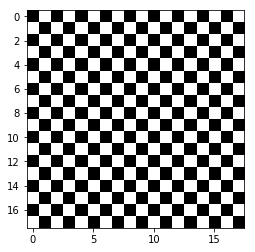

In [5]:
import numpy as np
check = np.zeros((18, 18))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
import matplotlib.pyplot as plt
plt.imshow(check, cmap='gray') 



img.save("fractal.png")


pil_im = Image.open('fractal.png', 'r')
plt.imshow(np.asarray(pil_im))